In [1]:
using InterpolatingFunctions
using ForwardDiff
using Plots

In [2]:
x_coarse = linspace(0,2pi,6)
x_fine = linspace(0,2pi,100)
y_coarse = sin(x_coarse)
y_fine = sin(x_fine);

# Linear Interpolation

In [3]:
f_linear = interpolate(y_coarse, (x_coarse,), LinearSpline())

(::InterpolatingFunction) (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot


INFO: Recompiling stale cache file /home/lstagner/.julia/lib/v0.5/PyPlot.ji for module PyPlot.



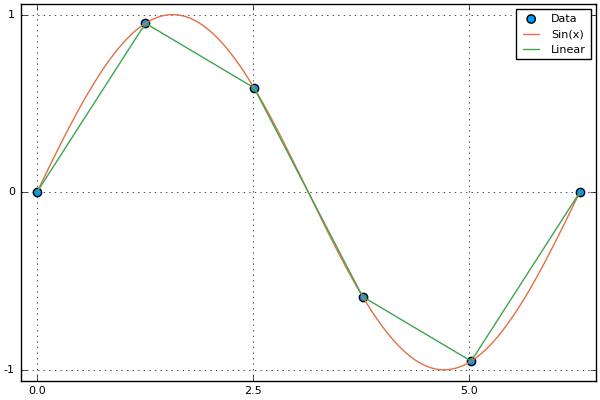

In [4]:
scatter(x_coarse, y_coarse, label = "Data")
plot!(x_fine, y_fine, label="Sin(x)")
plot!(x_fine, f_linear.(x_fine), label = "Linear")

# Polynomial Interpolation

In [5]:
f_poly = interpolate(y_coarse, (x_coarse,), Polynomial)

(::InterpolatingFunction) (generic function with 1 method)


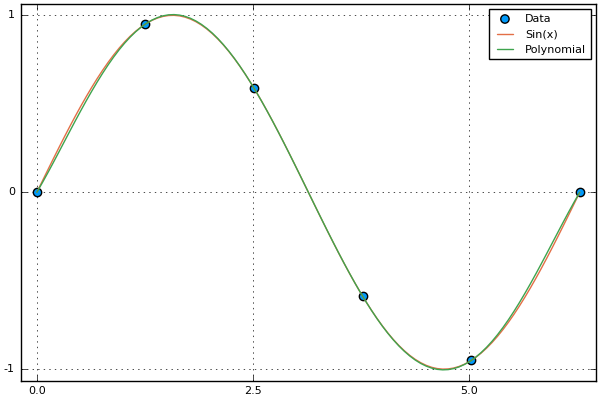

In [6]:
scatter(x_coarse, y_coarse, label = "Data")
plot!(x_fine, y_fine, label="Sin(x)")
plot!(x_fine, f_poly.(x_fine), label = "Polynomial")

# Cubic Splines

In [7]:
f_cubic = interpolate(y_coarse, (x_coarse,), CubicSpline())

(::InterpolatingFunction) (generic function with 1 method)


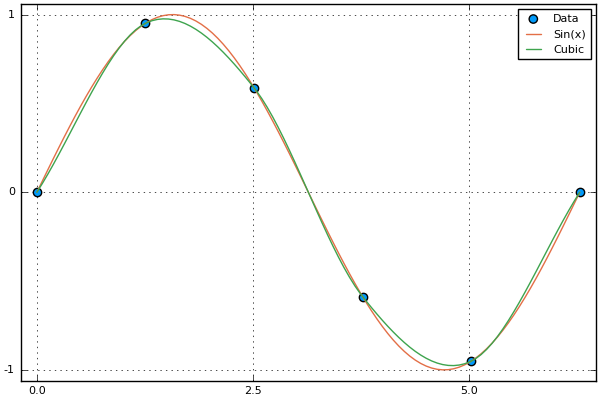

In [8]:
scatter(x_coarse, y_coarse, label = "Data")
plot!(x_fine, y_fine, label="Sin(x)")
plot!(x_fine, f_cubic.(x_fine), label = "Cubic")

# Polyharmonic / Thin Plate Spline

In [9]:
f_poly2 = interpolate(y_coarse, (x_coarse,), PolyharmonicSpline(2))

(::InterpolatingFunction) (generic function with 1 method)


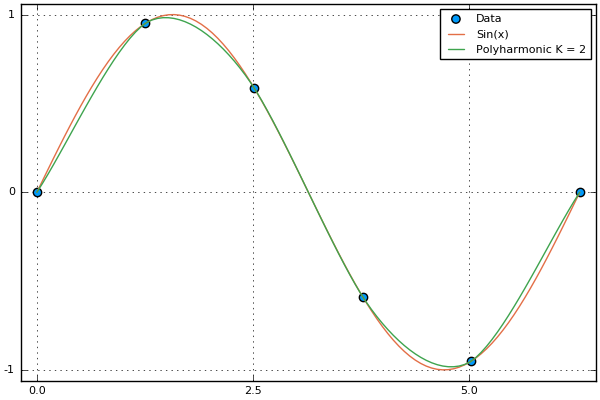

In [10]:
scatter(x_coarse, y_coarse, label = "Data")
plot!(x_fine, y_fine, label="Sin(x)")
plot!(x_fine, f_poly2.(x_fine), label = "Polyharmonic K = 2")


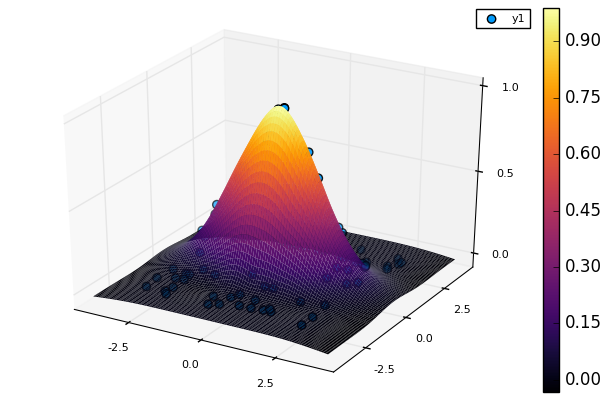

In [11]:
x = -3 + 6*rand(100)
y = -3 + 6*rand(100)
g(x,y) = exp(-((x/2)^2 + y^2))
z = g.(x,y)

f = interpolate(z, (x,y), PolyharmonicSpline())

xx = linspace(-4,4,100)
yy = linspace(-4,4,100)
zz = [f(x,y) for x in xx, y in yy ]

scatter(x,y,z)
surface!(xx,yy,zz')

# Bilinear Interpolation


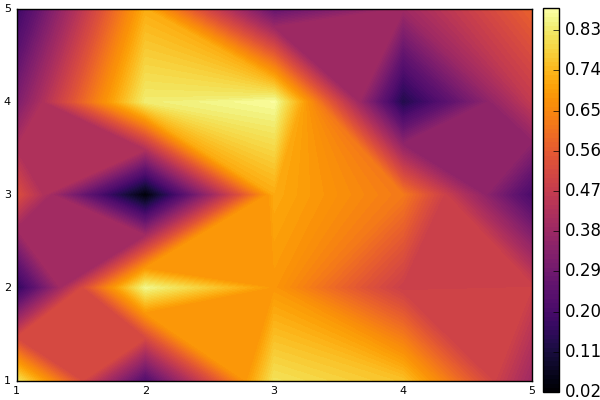

In [12]:
z = rand(5,5);
contour(1:5,1:5,z',fill=true,levels=100)

In [13]:
fz = interpolate(z,(1:5,1:5),BilinearSpline())

(::InterpolatingFunction) (generic function with 1 method)


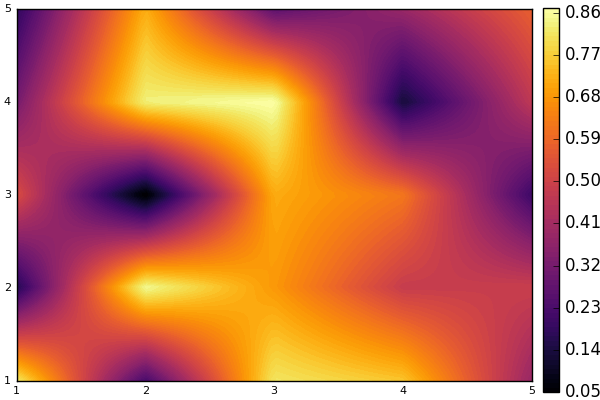

In [14]:
xx = linspace(1,5,100)
yy = linspace(1,5,100)
zz = [fz(x,y) for x in xx, y in yy];

contour(xx,yy,zz',fill=true,levels=100)

# Bicubic Interpolation

In [15]:
fz_cubic = interpolate(z,(1:5,1:5), BicubicSpline())

(::InterpolatingFunction) (generic function with 1 method)

In [16]:
xx = linspace(1,5,100)
yy = linspace(1,5,100)
zz = [fz_cubic(x,y) for x in xx, y in yy];


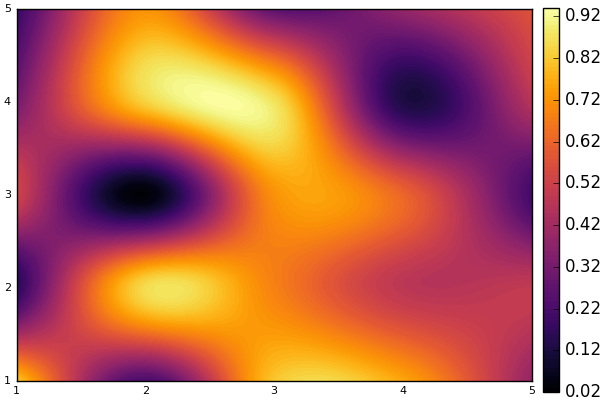

In [17]:
contour(xx,yy,zz',fill=true,levels=100)

# ForwardDiff Compatable

In [18]:
ForwardDiff.gradient(fz_cubic, [2.0,2.0])

2-element Array{Float64,1}:
  0.265049 
 -0.0955073